<!-- DON'T EDIT THIS CELL! -->
<!-- TYPE SHIFT+ENTER AND GO TO THE NEXT CELL -->

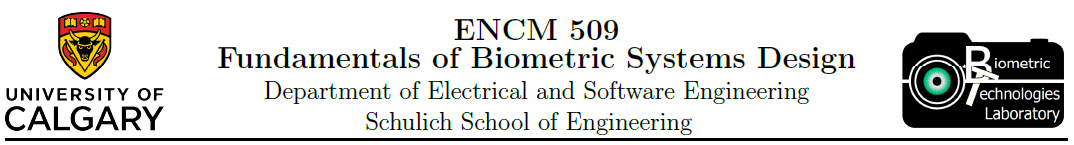

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.stats import norm
import os

# to keep a good size for the plot figure, not the plot area!
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

## Exercises

**General Marks**
1. Introduction (a paragraph about the purpose of the lab).
2. (10 marks) Description of the result on each exercise  with illustrations/graphs and analysis of the results (marks are distributed as shown in the Exercise section).
3. Conclusion (a paragraph on what is the main take-out of the lab).

## Introduction

The purpose of this lab is to introduce us to data acquisition and get familiar with biometric sensors and statistics. This lab uses tablets to record our signatures. The signatures are saved as csv files with velocity, speed, and pressure data for various points in time. This component of the lab demonstrates how biometric samples are recorded and converted into templates using feature extraction. The rest of the lab deals with plotting histograms of genuine and imposter samples. The exercises and graphs completed below show how a threshold can be chosen by examining these distributions. These histograms also illustrate how overlapping distributions result in false matches and false non-matches. In future labs we will build on this work by incorporating models for identification and verification. 

**Specific Questions** (See the handout PDF for details)

- **Exercise 1** (2 marks): Consider a random sample of a normally distributed data with mean $\mu = 50$ and standard deviation $\sigma = 5$. The Scipy's function `norm.rvs(...)` is used to draw samples from a normal distribution.
    - Create another set of 1000 samples with $\mu = 50$ and $\sigma = 5$.
    - Plot the histogram with 100 bins.
    - Compare the results of the calculations of both sets. What conclusions can be drawn from the amount of samples compared with the mean and standard deviation calculated and the number of bins considered? 

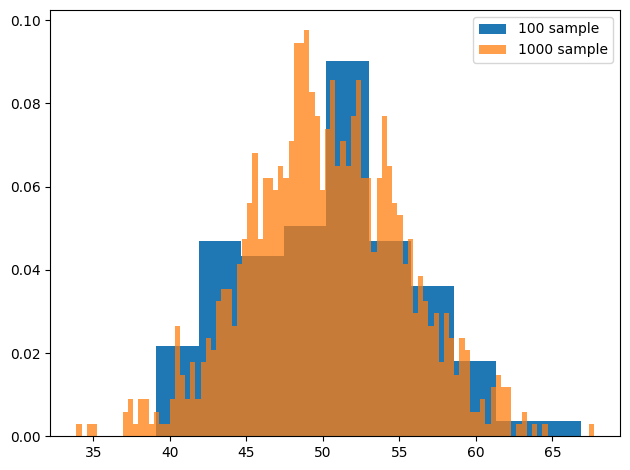

In [2]:
# Theorectical Mean and Std

# first plot
mu = 50
std = 5
qtt_samples = 100
pop_norm = norm.rvs(mu, std, size=qtt_samples)
plt.hist(pop_norm, bins=10, density=True)

mu = 50
std = 5
qtt_samples = 1000
pop_norm = norm.rvs(mu, std, size=qtt_samples)
plt.hist(pop_norm, bins=100, density=True, alpha=0.75)

plt.legend(["100 sample", "1000 sample"])
plt.show()

The 1000 sample plot histogram appears more like a normal distribution than the histogram in the 100 sample plot. Both histograms were sampled from a normal distribution with a mean of 50 and standard deviation of 5. However, this histogram contains 1000 samples in comparison to 80 in the example. Since the function norm.rvs() generates data randomly from a normal distribution, increasing the number of samples will result in a closer approximation to a normal curve. In addition, our histogram contains 100 bins rather than 10. Using fewer bins aggregates the data more resulting in a curve that appears more blocky than smooth as seen in the 100 sample plot. By using 100 bins our histogram better reflects a normal distribution. 

- **Exercise 2** (1 marks): Consider a sample data of the word *Biometrics* written by a "genuine" person, and an "impostor" as a signature that replicates the shape but not the original pressure. Load the sample signature provided.

In [3]:
# Path to file 
direct = 'signature_samples/biometrics/impostor/2.csv'
data_dir = os.getcwd() + '/signature_samples/biometrics/impostor/'
csv_file = pd.read_csv(data_dir + '1.csv')

# show the first lines of the data loaded
# the file contains 4 columns : [X, Y, Time , Pressure ]
csv_file.head()

# splitting the original data/ matrix into 3 variables
coord1 = csv_file[['X', 'Y']].to_numpy()
time1 = csv_file['Time'].to_numpy().reshape((-1,1))
prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

In [4]:
# to correctly map the pressure into the colormap the normalization is required 
prs1 = prs1 / np.max(prs1) * 255
prs1 = prs1.astype(int)

pressuremap = cm.get_cmap('jet', np.max(prs1)+1)

/var/folders/hy/3zt6fpm52v137lbvptw6fkjr0000gp/T/ipykernel_60688/910872588.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm);


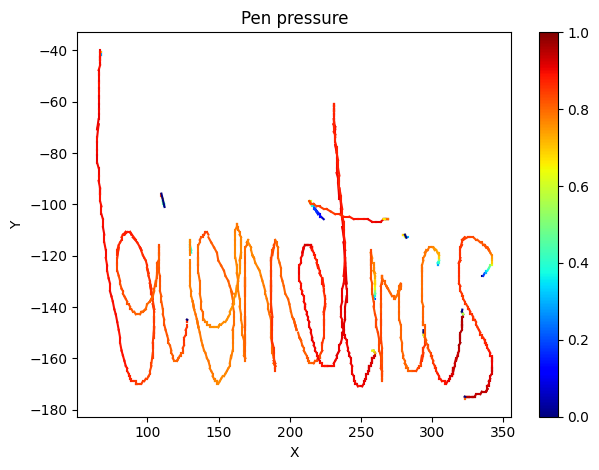

In [5]:
for i in range(len(prs1)-1):
    c = pressuremap(prs1[i]).squeeze()
    
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff == 0:
        time_diff = 0.0001
        
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2,0], -coord1[i:i+2,1], c=c)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pen pressure')

sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm);

210.82958665699783 33.413596352704396


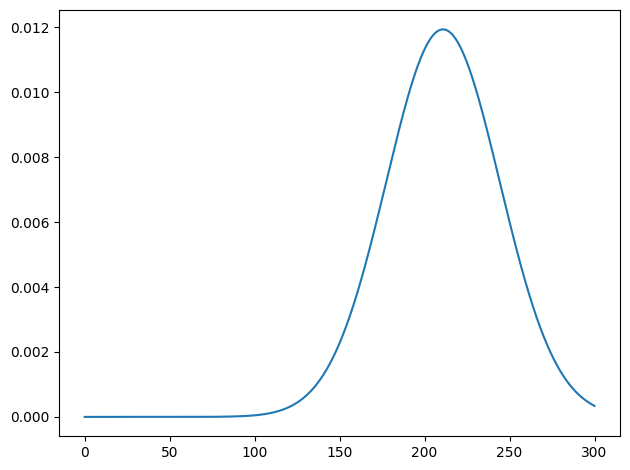

In [6]:
mu_prs = np.mean(prs1)
std_prs = np.std(prs1)
print(mu_prs, std_prs)

x = np.arange(0, 300, 0.01)

x_pdf = norm.pdf(x, loc=mu_prs, scale=std_prs)

plt.plot(x, x_pdf);

- **Exercise 3** (1 mark): The code to calculate velocity and plot velocity map of one signature, provided in this lab, has the following `if` statement: `if time_diff == 0:`. Explain why it is necessary.

In [7]:
print(csv_file.head())

           X          Y  Pressure  Time
0  67.631005  41.681700  0.162419     0
1  67.631005  40.666956  0.273965    14
2  67.631005  41.681700  0.180029    14
3  67.631005  41.681700  0.217200    14
4  67.631005  40.666956  0.336589    29


/var/folders/hy/3zt6fpm52v137lbvptw6fkjr0000gp/T/ipykernel_60688/2380366955.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


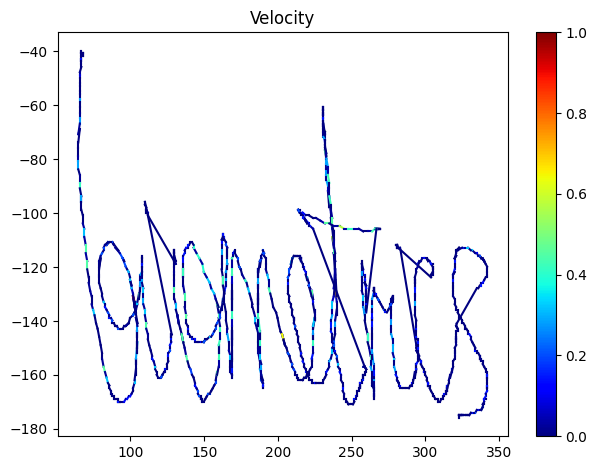

In [8]:
vel = np.zeros((len(time1)-1, 1))

for i in range(len(time1)-1):
    distance = np.sqrt((coord1[i+1, 0] - coord1[i ,0])**2 +
                       (coord1[i+1, 1] - coord1[i ,1])**2)
    
    # if too fast, time diff = 0
    time_diff = abs(time1[i+1] - time1[i])
    if time_diff != 0:
        vel[i] = distance / time_diff
    vel[i] = int(vel[i] * 1000) + 1
    
vel = np.insert(vel, 0, 1)
vel = vel/np.max(vel) * 255
vel = vel.astype(int)

velmap = cm.get_cmap('jet', np.max(vel)+1)
for i in range(len(vel)-1):
    c = velmap(vel[i])
    if time_diff < 17: # You may need to change this threshould
        im = plt.plot(coord1[i:i+2, 0], -coord1[i:i+2, 1], c=c)
plt.title('Velocity')
sm = cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
plt.colorbar(sm)
    

In the above data there are three samples for time=14. This happens when a person moves the pen too fast that the sensor collects multiple data points in a short period of time. Since our sensor only records with a limited sample rate it appears as if the data is collected at the same time. If the time difference between samples is zero we will get an error when we try to divide. To solve this problem we use an if statement and multiply our velocity vector by 1000 and add 1 to make it some large random number. Alternatively you could set time_diff to be a small number such as 0.0001 and calculate velocity like normal.

Text(0.5, 0.92, 'Pen pressure in 3D')

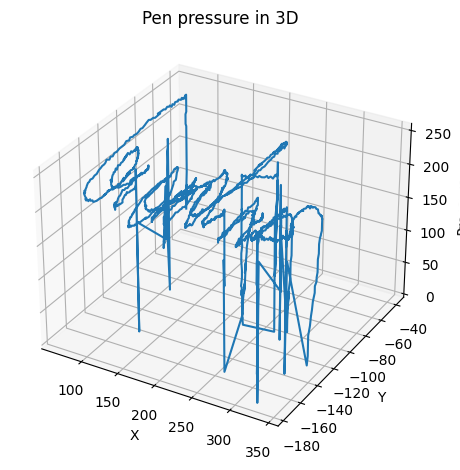

In [9]:
ax = plt.axes(projection='3d')

# the line below is to reshape to vector using . flatten method
ax.plot3D(coord1[:, 0].flatten(), -coord1[: ,1].flatten(), prs1.flatten())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Pressure')
ax.set_title ('Pen pressure in 3D')

- **Exercise 4** (3 marks): Now  perform statistical analysis of pressure and velocity distribution  across average values of pressure or 30 signatures of the same person. We will represent the pressure of each signature by its average (mean) value, and then consider the distribution of these average values across genuine signatures. Consider 30 genuine signatures (yours or pre-recorded sample set, part a), and calculate average (mean) values and deviation from average (which will be calculated using standard deviation) for pressure. Plot a normal distribution of the average pressure values across the 30 signatures of the same individual. Perform the same for velocity. 

In [10]:
def calc_velocity(time , coords):
    vel = np.zeros((len(time)-1, 1))
    
    for i in range (len(time)-1):
        distance = np.sqrt((coords[i+1 ,0] - coords[i ,0])**2 + (coords[i+1 ,1] - coords[i ,1])**2)
        
        # if too fast time diff = 0
        time_diff = time[i+1] = time[i]
        if time_diff == 0:
            time_diff = 0.0001
            
        vel[i] = distance / time_diff
        vel[i] = int(vel[i] * 1000) + 1
        
    vel = np. insert (vel , 0, 1)
    vel = vel / np.max(vel) * 255
    vel = vel. astype (int)
    return vel

In [11]:
# columns: mean_vel, std_vec, mean_prs, std_prs
stats_measures = np.zeros((30,4))  # 30 samples with 4 properties each (vel_mean, vel_std, pressure_mean, pressure_std)

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(os.getcwd() + '/signature_samples/biometrics/genuine/' + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    stats_measures[i, 0] = np.mean(vel)
    stats_measures[i, 1] = np.std(vel)
    
    stats_measures[i, 2] = np.mean(prs1)
    stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.25; velocity: 7.31
#1 - pressure: 0.27; velocity: 7.09
#2 - pressure: 0.23; velocity: 5.97
#3 - pressure: 0.18; velocity: 7.30
#4 - pressure: 0.17; velocity: 6.77
#5 - pressure: 0.18; velocity: 6.67
#6 - pressure: 0.19; velocity: 7.24
#7 - pressure: 0.20; velocity: 8.71
#8 - pressure: 0.28; velocity: 6.51
#9 - pressure: 0.23; velocity: 6.62
#10 - pressure: 0.19; velocity: 7.41
#11 - pressure: 0.20; velocity: 6.45
#12 - pressure: 0.23; velocity: 8.44
#13 - pressure: 0.22; velocity: 8.35
#14 - pressure: 0.21; velocity: 8.66
#15 - pressure: 0.22; velocity: 9.26
#16 - pressure: 0.23; velocity: 9.99
#17 - pressure: 0.26; velocity: 9.55
#18 - pressure: 0.24; velocity: 12.29
#19 - pressure: 0.24; velocity: 7.65
#20 - pressure: 0.23; velocity: 7.66
#21 - pressure: 0.25; velocity: 8.99
#22 - pressure: 0.22; velocity: 7.41
#23 - pressure: 0.24; velocity: 7.68
#24 - pressure: 0.25; velocity: 10.18
#25 - pressure: 0.28; velocity: 11.02
#26 - pressure: 0.25; velocity: 9.89
#27 - pr

Text(0, 0.5, 'Frequency')

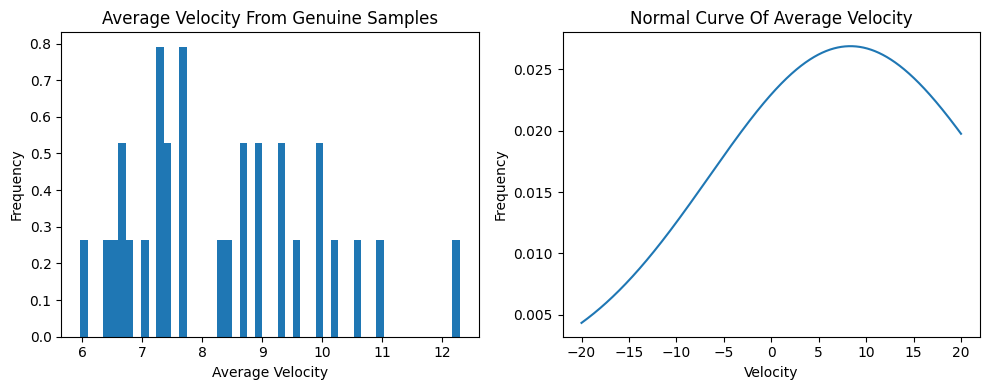

In [12]:
# Plot histogram of average velocity samples 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(stats_measures[:, 0], bins=50, density=True)
plt.title('Average Velocity From Genuine Samples')
plt.xlabel('Average Velocity')
plt.ylabel('Frequency')

x = np.arange(-20, 20, 0.01)
x_pdf = norm.pdf(x, loc=np.mean(stats_measures[:, 0]), scale=np.mean(stats_measures[:, 1]))

plt.subplot(1,2,2)
plt.plot(x, x_pdf);
plt.title('Normal Curve Of Average Velocity')
plt.xlabel('Velocity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

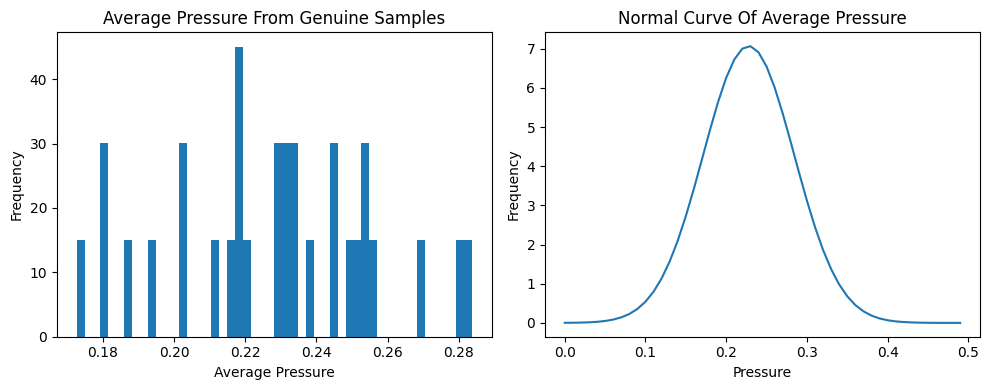

In [13]:
# Average Pressure 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(stats_measures[:, 2], bins=50, density=True)
plt.title('Average Pressure From Genuine Samples')
plt.xlabel('Average Pressure')
plt.ylabel('Frequency')

x = np.arange(0, 0.5, 0.01)
x_pdf = norm.pdf(x, loc=np.mean(stats_measures[:, 2]), scale=np.mean(stats_measures[:, 3]))

plt.subplot(1,2,2)
plt.plot(x, x_pdf);
plt.title('Normal Curve Of Average Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

- **Exercise 5** (3 marks): Perform statistical analysis of average pressure and velocity distribution across 30 impostor signatures. As an "impostor", you can use either the 30 "forged" signatures (or part $b$ of the pre-recorded set), or 30 writings by yourself, of different shape/word (or part $c$ of the pre-recorded set). Represent the pressure (or velocity) of each signature by its average (mean), and then consider the distribution of these averages across 30 impostor signatures. How different are those distributions for "genuine" signatures from Exercise 4 and the "impostor" from Exercise 5?

In [14]:
# columns: mean_vel, std_vec, mean_prs, std_prs
im_stats_measures = np.zeros((30,4))

# using 10-30 signatures
for i in range(30):
    csv_file = pd.read_csv(os.getcwd() + '/signature_samples/biometrics/impostor/' + '%d.csv' % (i+1))
    
    coord1 = csv_file[['X', 'Y']].to_numpy()
    time1 = csv_file['Time'].to_numpy().reshape((-1,1))
    prs1 = csv_file['Pressure'].to_numpy().reshape((-1,1))

    vel = calc_velocity(time1, coord1)
    
    im_stats_measures[i, 0] = np.mean(vel)
    im_stats_measures[i, 1] = np.std(vel)
    
    im_stats_measures[i, 2] = np.mean(prs1)
    im_stats_measures[i, 3] = np.std(prs1)
    
    print('#%d - pressure: %.2f; velocity: %.2f' %\
          (i, np.mean(prs1), np.mean(vel)))

#0 - pressure: 0.63; velocity: 3.74
#1 - pressure: 0.50; velocity: 5.17
#2 - pressure: 0.50; velocity: 3.90
#3 - pressure: 0.53; velocity: 1.93
#4 - pressure: 0.47; velocity: 2.01
#5 - pressure: 0.52; velocity: 2.03
#6 - pressure: 0.49; velocity: 3.40
#7 - pressure: 0.53; velocity: 2.69
#8 - pressure: 0.52; velocity: 2.59
#9 - pressure: 0.50; velocity: 3.27
#10 - pressure: 0.49; velocity: 3.75
#11 - pressure: 0.54; velocity: 2.51
#12 - pressure: 0.54; velocity: 3.02
#13 - pressure: 0.52; velocity: 3.00
#14 - pressure: 0.55; velocity: 2.11
#15 - pressure: 0.56; velocity: 2.77
#16 - pressure: 0.54; velocity: 4.81
#17 - pressure: 0.58; velocity: 4.07
#18 - pressure: 0.61; velocity: 3.04
#19 - pressure: 0.68; velocity: 2.22
#20 - pressure: 0.52; velocity: 2.33
#21 - pressure: 0.58; velocity: 3.18
#22 - pressure: 0.58; velocity: 4.46
#23 - pressure: 0.64; velocity: 3.22
#24 - pressure: 0.59; velocity: 4.22
#25 - pressure: 0.60; velocity: 4.28
#26 - pressure: 0.58; velocity: 5.67
#27 - press

Text(0, 0.5, 'Frequency')

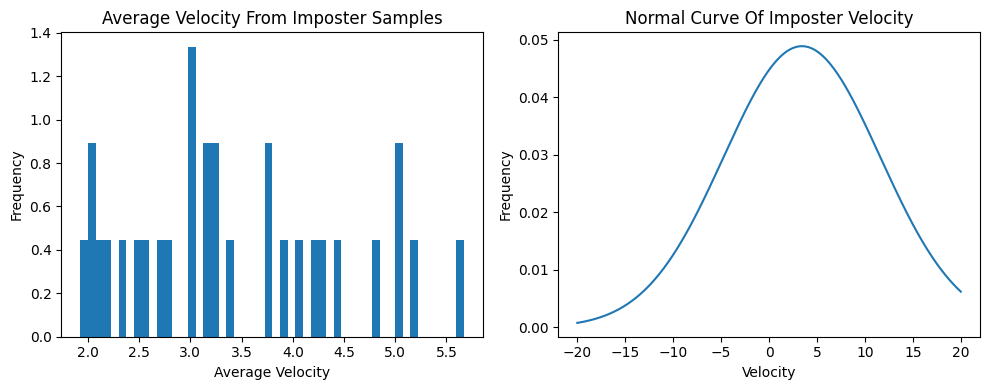

In [15]:
# Plot histogram of average velocity samples 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(im_stats_measures[:, 0], bins=50, density=True)
plt.title('Average Velocity From Imposter Samples')
plt.xlabel('Average Velocity')
plt.ylabel('Frequency')

x = np.arange(-20, 20, 0.01)
x_pdf = norm.pdf(x, loc=np.mean(im_stats_measures[:, 0]), scale=np.mean(im_stats_measures[:, 1]))

plt.subplot(1,2,2)
plt.plot(x, x_pdf);
plt.title('Normal Curve Of Imposter Velocity')
plt.xlabel('Velocity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

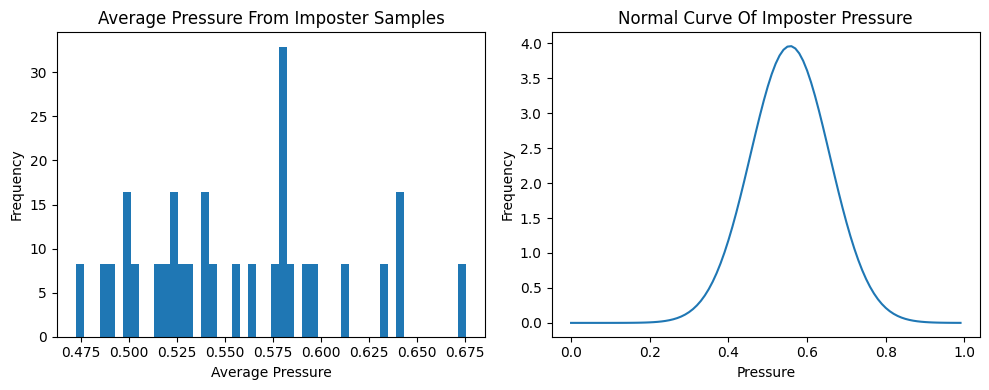

In [16]:
# Average Pressure 

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(im_stats_measures[:, 2], bins=50, density=True)
plt.title('Average Pressure From Imposter Samples')
plt.xlabel('Average Pressure')
plt.ylabel('Frequency')

x = np.arange(0, 1, 0.01)
x_pdf = norm.pdf(x, loc=np.mean(im_stats_measures[:, 2]), scale=np.mean(im_stats_measures[:, 3]))

plt.subplot(1,2,2)
plt.plot(x, x_pdf);
plt.title('Normal Curve Of Imposter Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

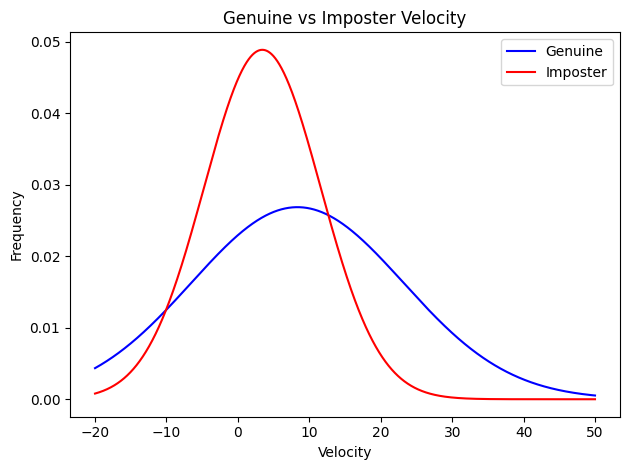

In [17]:
# Plot both on same axis 
real = np.arange(-20, 50, 0.01)
real_pdf = norm.pdf(real, loc=np.mean(stats_measures[:, 0]), scale=np.mean(stats_measures[:, 1]))
plt.plot(real, real_pdf, 'b');

fake = np.arange(-20, 50, 0.01)
fake_pdf = norm.pdf(fake, loc=np.mean(im_stats_measures[:, 0]), scale=np.mean(im_stats_measures[:, 1]))
plt.plot(fake, fake_pdf, 'r');

plt.title('Genuine vs Imposter Velocity')
plt.legend(['Genuine', 'Imposter'])
plt.xlabel('Velocity')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

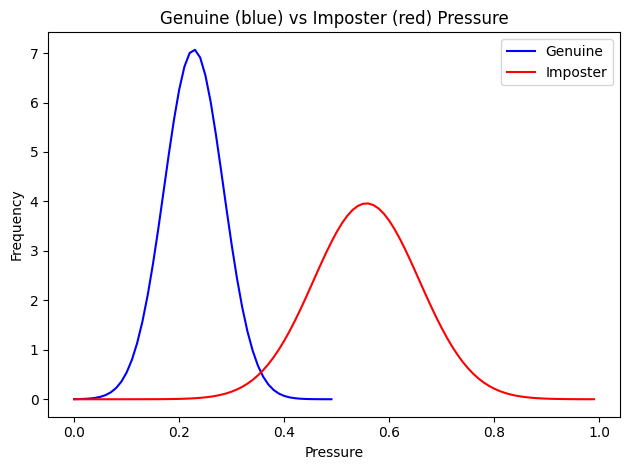

In [18]:
real = np.arange(0, 0.5, 0.01)
real_pdf = norm.pdf(real, loc=np.mean(stats_measures[:, 2]), scale=np.mean(stats_measures[:, 3]))
plt.plot(real, real_pdf, 'b');

fake = np.arange(0, 1, 0.01)
fake_pdf = norm.pdf(fake, loc=np.mean(im_stats_measures[:, 2]), scale=np.mean(im_stats_measures[:, 3]))
plt.plot(fake, fake_pdf, 'r');

plt.title('Genuine (blue) vs Imposter (red) Pressure')
plt.legend(['Genuine', 'Imposter'])
plt.xlabel('Pressure')
plt.ylabel('Frequency')

The above figures plot the genuine and imposter distribution on the same graph. The images show that the imposter samples had a slightly slower velocity with higher variation than the genuine samples. The imposter samples also had a higher pressure with greater variation compared to the genuine samples. It is harder to choose a threshold for velocity because the genuine and imposter averages are relatively close. In comparison, it is very easy to draw a line between the genuine and imposter pressure distributions. If we were to receive a new signature, we could use the mean pressure to determine if the signature is Genuine or Imposter.

## Conclusion

In conclusion, after completing this lab we are able to do some light data analysis on signatures, being able to determine genuine from imposter signatures using the pressure and velocity when writing them. This analysis is interesting, but would struggle to be secure, since we are not considering the shape of the signatures. Malicious imposters could simply attempt a large variety of speeds and pressures and eventually trick our system into letting them in. Hopefully in future labs we can work to remedy this major flaw.